In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist, fashion_mnist

In [2]:
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

np.set_printoptions(threshold=np.inf, linewidth=500)

## 1. 이미지셋을 읽기

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
train_images[0].shape

(28, 28)

In [5]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

## 2. 이미지 데이터 전처리 -> 4차원
###    1) 4차원을 만들어준다
###      - 이미지셋 자체는 3차원: 이미지(2차원)이 여러장
###      - 이미지 픽셀마다의 특정(특징)을 추출하는 처리를 하기 위한 차원 하나 더 추가
###    2) 데이터를 읽어왔을 때 픽셀마다의 값의 명암정도만 가지고 있음(0-255) (검은색-흰색)
###      - 0~1 사이로 스케일링(표준화)시켜줌
###      - 방법)255로 나눠주면 됨
###    3) 이미지는 크기가 아주 다양함 -> 크기를 표준화

In [6]:
# 1) 4차원 만들기
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [7]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
train_images, test_images = train_images/255.0, test_images/255.0

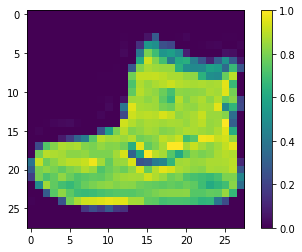

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

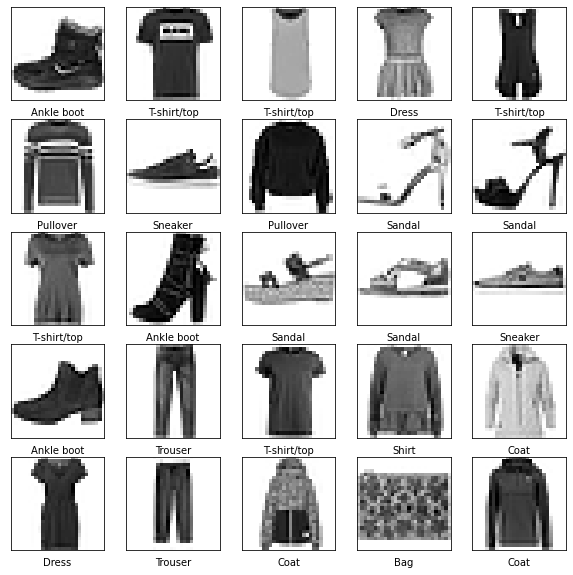

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

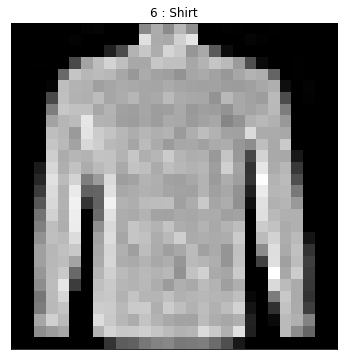

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(train_images[8703], cmap ='gray')
plt.title(f'{train_labels[8703]} : {class_names[train_labels[8703]]}')
plt.xticks([])
plt.yticks([])
plt.show()


## 3. 특성 추출처리

In [14]:
model = Sequential()

Metal device set to: Apple M1 Pro


2022-06-08 13:10:38.922128: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-08 13:10:38.923405: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))

## 4. 특성 추출한 결과를 학습 데이터로 넣어서 학습할 예정
### deep modeling
###     1) 특성추출한 이미지 데이터를 1차원으로 만들어주세요. (Flatten())
###     2) 딥러닝 심층신경망(deep MLP)
###     3) fit()

In [16]:
model.add(Flatten()) ## 입력층
model.add(Dense(128, activation='relu')) ## 히든층
model.add(Dense(10, activation='softmax')) ## 출력층

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [18]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
#history = model.fit(train_images, train_labels, validation_split=0.25, epochs=10, verbose=1)


In [20]:
y_train_one_hot = tf.keras.utils.to_categorical(train_labels, 10)
y_valid_one_hot = tf.keras.utils.to_categorical(test_labels, 10)


In [21]:
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(800, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [22]:
mlp_model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath='model.weights.best.mlp.develop.hdf5', verbose=0, save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=50)
history = mlp_model.fit(train_images, y_train_one_hot, epochs=10, batch_size=50,
                            validation_split=0.2, callbacks=[checkpoint, earlystopping], verbose=0)

2022-06-08 13:10:40.922034: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-08 13:10:41.189185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-08 13:10:50.025454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## 5. 모델에 대해 평가
###     1) test데이터를 검증 => overfitting 여부 확인!!
###     2) 시각화로 평가

In [24]:
loss, acc = model.evaluate(test_images, test_labels)
loss, acc

  1/313 [..............................] - ETA: 1:26 - loss: 2.2952 - accuracy: 0.1562

2022-06-08 13:12:19.074975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step - loss: 2.3071 - accuracy: 0.0846


(2.3071086406707764, 0.08460000157356262)

In [25]:
y_pred = model.predict(test_images)
y_pred[0]

 84/313 [=======>......................] - ETA: 0s

2022-06-08 13:12:20.702470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


array([0.0978956 , 0.10007705, 0.09210756, 0.09946362, 0.10055904, 0.099329  , 0.10559045, 0.10561537, 0.1018206 , 0.09754171], dtype=float32)

In [26]:
import numpy as np

In [27]:
y_pred0_index = np.argmax(y_pred[0]) 
y_pred0_index

7

In [28]:
y_pred_test = np.argmax(y_pred, axis= -1)
y_pred_test

array([7, 7, 1, 1, 7, 1, 1, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 7, 6, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 6, 7, 6, 7, 1, 1, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 6, 7, 6, 7, 7, 6, 6, 7, 1, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 1, 1, 7, 7, 7, 1, 7, 7, 7, 1, 7, 6, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7,
       7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 6, 7, 7, 6, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 6, 7, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 6, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 8, 6, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 1, 7, 7, 7, 7, 7, 7, 1, 7, 7, 1, 7, 7, 1, 7, 7, 6, 6,
  

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(accuracy_score(test_labels, y_pred_test))
print(confusion_matrix(test_labels, y_pred_test))

0.0846
[[  0  17   0   1   0  15   1 966   0   0]
 [  0 342   0   0   0   1   2 655   0   0]
 [  0  21   0   0   0   7   5 967   0   0]
 [  0  13   0   1   0   2   5 979   0   0]
 [  0  16   0   0   0   9   4 971   0   0]
 [  0 139   0   0   0  27 279 553   2   0]
 [  0  19   0   0   0  15   7 959   0   0]
 [  0   4   0   0   0   0 527 469   0   0]
 [  0  31   0   0   0   1 184 784   0   0]
 [  0   0   0   0   0   0 249 699  52   0]]


In [30]:
result = confusion_matrix(test_labels, y_pred_test)
result.shape

(10, 10)

In [31]:
result_acc = []
for x in range(0, 10):
    result_acc.append(result[x][x])
result_acc

[0, 342, 0, 1, 0, 27, 7, 469, 0, 0]

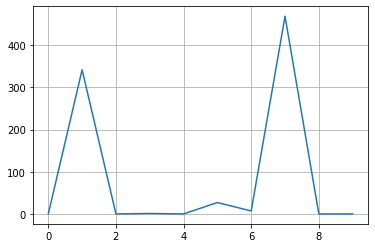

In [32]:
import matplotlib.pyplot as plt
plt.plot(result_acc)
plt.grid()
plt.show()

In [33]:
precision_score(test_labels, y_pred_test, average='weighted')

/Users/syshin/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.14829083698164555

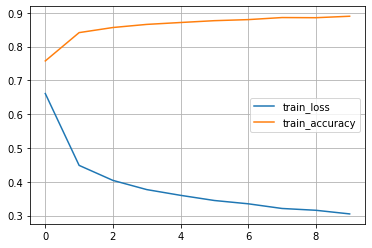

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['train_loss','train_accuracy'])
plt.grid()
plt.show()

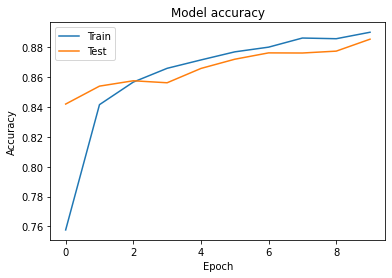

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

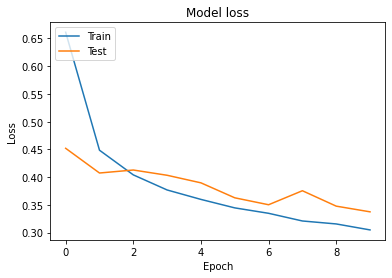

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

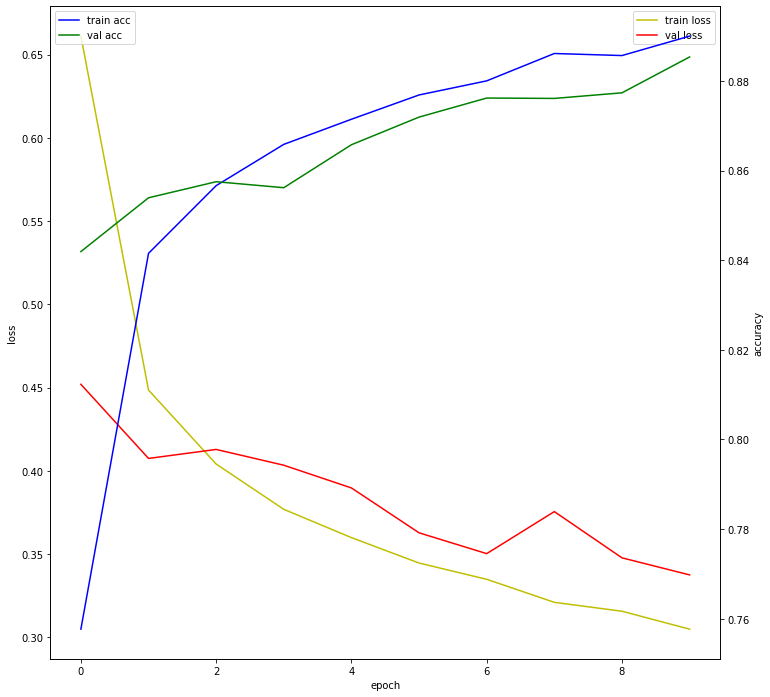

In [37]:
# Multi Layer Perceptron 학습시각화
fig, loss_ax = plt.subplots(figsize=(12, 12))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

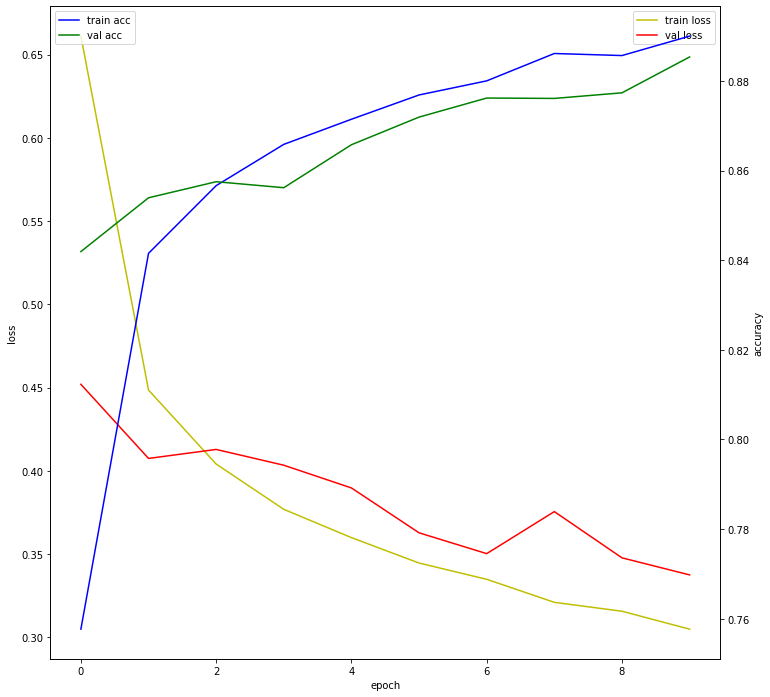

In [38]:
# - Convolution Neural Network 학습 시각
fig, loss_ax = plt.subplots(figsize=(12, 12))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()


In [39]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

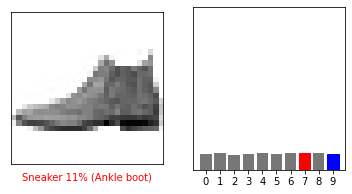

In [44]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i],  test_labels)
plt.show()

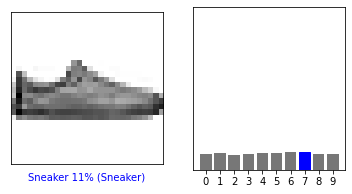

In [45]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i],  test_labels)
plt.show()

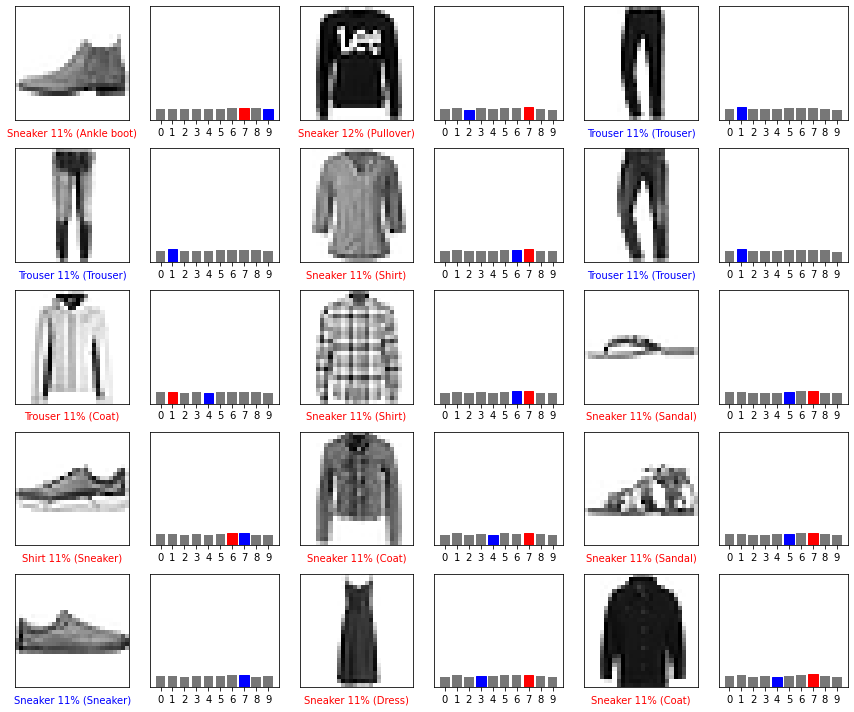

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred[i], test_labels)
plt.tight_layout()
plt.show()